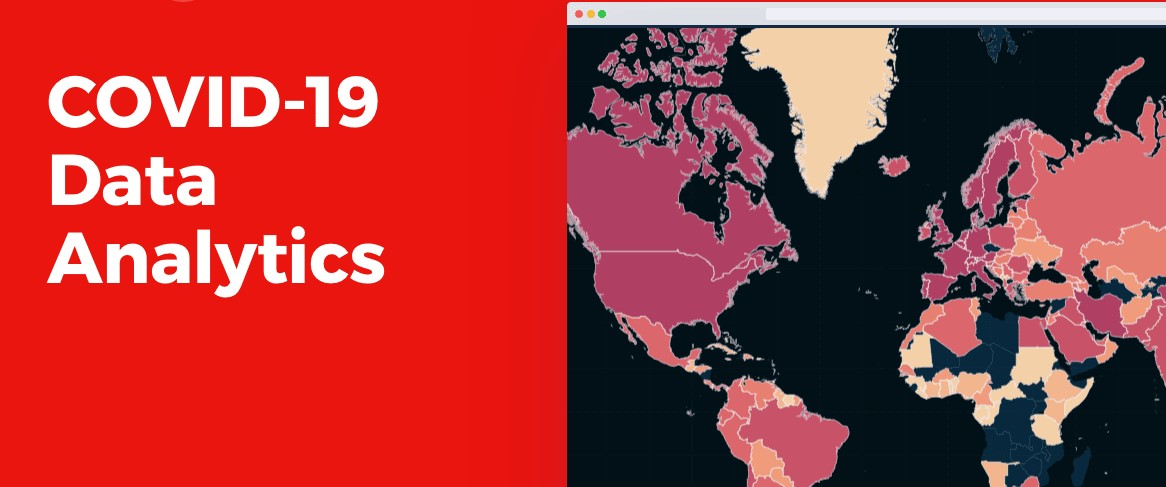

importing libraries 

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

links for covid 19 dataset

In [16]:
covid19_confirmed_cases_link = "time_series_covid19_confirmed_global.csv"
covid19_death_cases_link = "time_series_covid19_deaths_global.csv"
covid19_recovered_cases_link = "time_series_covid19_recovered_global.csv"
covid19_countries_cases_link =  "cases_country.csv"

downloading dataset in respective dataframes

In [17]:
confirmed_df = pd.read_csv(covid19_confirmed_cases_link)
death_df = pd.read_csv(covid19_death_cases_link)
recovered_df = pd.read_csv(covid19_recovered_cases_link)
cases_countries_df  = pd.read_csv(covid19_countries_cases_link)
print(confirmed_df.shape)
print(death_df.shape)
print(recovered_df.shape)
print(cases_countries_df.shape)

(266, 209)
(266, 209)
(253, 209)
(188, 14)


it shows 266 rows and as we can see below their is a column country their so we can simply conclude that each row cannot be  a country.

In [18]:
confirmed_df[confirmed_df["Country/Region"] == "Australia"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,3820,3832,3842,3851,3861,3875,3897,3915,3927,3936
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,33,33,33,33,33,33,33,33,33,33
11,Queensland,Australia,-27.4698,153.0251,0,0,0,0,0,0,...,1088,1088,1087,1088,1088,1089,1089,1089,1089,1091
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,457,456,459,459,459,459,459,459,459,460
13,Tasmania,Australia,-42.8821,147.3272,0,0,0,0,0,0,...,229,229,229,229,229,229,229,230,230,230
14,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,13035,13469,13867,14283,14659,14957,15251,15646,15863,16234
15,Western Australia,Australia,-31.9505,115.8605,0,0,0,0,0,0,...,670,670,642,642,642,642,642,642,644,645


so to find out how many diffrent countries are their we want to use nunique function.

In [19]:
confirmed_df["Country/Region"].nunique()

188

so this data contains 188 diffrent countries .

now as their might be many null values so we are going to imputing data.

In [20]:
confirmed_df = confirmed_df.replace(np.nan, '', regex = True)
death_df = death_df.replace(np.nan, '', regex = True)
recovered_df = recovered_df.replace(np.nan, '', regex = True)
cases_countries_df = cases_countries_df.replace(np.nan, '', regex = True)

In [27]:
confirmed_df


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20
0,,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424
1,,Albania,41.153300,20.168300,0,0,0,0,0,0,...,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971
2,,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,32504,33055,33626,34155,34693,35160,35712,36204,36699,37187
3,,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,939,939,944,955,955,955,963,963,977,981
4,,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1344,1395,1483,1538,1572,1672,1679,1735,1762,1815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,12770,13065,13398,13722,13928,14208,14510,14875,15184,15491
262,,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1760,1763,1768,1796,1797,1804,1832,1831,1841,1847
264,,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,6793,7022,7164,7486,7903,8085,8210,8275,8501,8663


In [21]:
confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '8/4/20', '8/5/20', '8/6/20', '8/7/20', '8/8/20', '8/9/20', '8/10/20',
       '8/11/20', '8/12/20', '8/13/20'],
      dtype='object', length=209)

In [28]:
cases_countries_df

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Afghanistan,2020-08-14 11:27:27,33.9391,67.71,37431.0,1363.0,26714,9354.0,96.1536,,,3.641367,4,AFG
1,Albania,2020-08-14 11:27:27,41.1533,20.1683,6971.0,213.0,3616,3142.0,242.234,,,3.055516,8,ALB
2,Algeria,2020-08-14 11:27:27,28.0339,1.6596,37187.0,1341.0,26004,9842.0,84.803,,,3.606099,12,DZA
3,Andorra,2020-08-14 11:27:27,42.5063,1.5218,981.0,53.0,858,70.0,1269.66,,,5.402650,20,AND
4,Angola,2020-08-14 11:27:27,-11.2027,17.8739,1815.0,80.0,577,1158.0,5.52238,,,4.407713,24,AGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,West Bank and Gaza,2020-08-14 11:27:27,31.9522,35.2332,15834.0,106.0,9382,6346.0,310.384,,,0.669445,275,PSE
184,Western Sahara,2020-08-14 11:27:27,24.2155,-12.8858,10.0,1.0,8,1.0,1.67412,,,10.000000,732,ESH
185,Yemen,2020-08-14 11:27:27,15.5527,48.5164,1847.0,528.0,949,370.0,6.19259,,,28.586898,887,YEM
186,Zambia,2020-08-14 11:27:27,-13.1339,27.8493,8663.0,246.0,7401,1016.0,47.1226,,,2.839663,894,ZMB


first three are time series data and the fourth one "case_countries_df"  is the aggregated data .
so , to find out total number of cases we use the fourth_one by adding all the patients whether they are confirmed ,or they dead , or they active or recovered . 

In [85]:
global_data = cases_countries_df.copy().drop(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Incident_Rate', 'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID' , 'ISO3'], axis=1)
global_summary = pd.DataFrame(global_data.sum()).transpose()
global_summary.style.format("{:0.0f}")

,Confirmed,Deaths,Active
0,20950402,760213,7175587


to get a plot we want the total number of confirmed cases globally.

In [86]:
confirmed_ts = confirmed_df.copy().drop(['Lat', 'Long','Province/State', 'Country/Region'], axis=1)
confirmed_ts_summary = confirmed_ts.sum()

In [87]:
confirmed_ts_summary

1/22/20         555
1/23/20         654
1/24/20         941
1/25/20        1434
1/26/20        2118
             ...   
8/9/20     19861683
8/10/20    20089624
8/11/20    20344188
8/12/20    20621140
8/13/20    20905891
Length: 205, dtype: int64

In [88]:
fig_1 = go.Figure(data=go.Scatter(x=confirmed_ts_summary.index, y=confirmed_ts_summary.values,mode = 'lines+markers'))
fig_1.update_layout(title='Total confirmed coronavirus cases globally', yaxis_title = 'confirmed_cases', xaxis_tickangle = 300)

fig_1.show()

now  as we are going to make the graph for all the four diffrent parameters that is active , recovered , death and confirmed 
we will make  an template function so that it is easy for us and we can use it again and again with color array.

In [89]:
#here we are initializing a color array
color_arr = px.colors.qualitative.Dark24

In [90]:
def draw_plot(ts_array, ts_label, title, colors, mode_size,line_size, x_axis_title, y_axis_title, tickangle = 0, y_axis_type=''):
    #initilalizing figure
    fig = go.Figure()
    #adding all traces
    for index, ts in enumerate(ts_array):
        fig.add_trace(go.Scatter(x=ts.index,
                                 y=ts.values,
                                 name = ts_label[index],
                                 line=dict(color=colors[index], width=line_size[index]),connectgaps = True),)
    
    #base x_axis properties
    x_axis_dict = dict(showline=True,
                       showgrid=True,
                       showticklabels=True,
                       linecolor='rgb(200,200,200)',
                       linewidth=2,
                       ticks='outside',
                       tickfont=dict(family='Arial', size=12, color='rgb(90,90,90)',))
    
    # x_axis parameters
    if x_axis_title:
        x_axis_dict['title'] = x_axis_title
    
    if tickangle > 0:
        x_axis_dict['tickangle'] =tickangle
        
        
    #y_axis properties
    y_axis_dict = dict(showline=True,
                   showgrid=True,
                   showticklabels=True,
                   linecolor='rgb(200,200,200)',
                   linewidth=2,)
    
    #y_axis parameters
    if y_axis_type != "":
        y_axis_dict['type'] = y_axis_type
    
    if y_axis_title:
        y_axis_dict['title'] = y_axis_title
        
        
    #updating the layout
    fig.update_layout(xaxis = x_axis_dict,
                      yaxis = y_axis_dict,
                      autosize=True,
                      margin=dict(autoexpand=True,l=100,r=20, t=110,),
                      showlegend =True,
                     )
    
    #annotations for any basic graph
    annotations = []
    #title
    annotations.append(dict(xref='paper', yref='paper', x=0.0, y= 1.05, xanchor='left', yanchor='bottom',text=title,
                            font=dict(family='Arial' ,size= 16, color='rgb(40,40,40)'),showarrow=False))
    
    
#     #adding annotationsi params
#     if len(additional_annotations) > 0:
#         annotations.append(additional_annotations)
        
#     #updating the layout
#     fig.update_layout(annotations=annotations)
    
    return fig
    
    
    

In [91]:
confirmed_agg_ts  = confirmed_df.copy().drop(['Lat', 'Long','Province/State', 'Country/Region'],axis=1).sum()
death_agg_ts  = death_df.copy().drop(['Lat', 'Long','Province/State', 'Country/Region'],axis=1).sum()
recovered_agg_ts  = recovered_df.copy().drop(['Lat', 'Long','Province/State', 'Country/Region'],axis=1).sum()
snipp
#now  as thier is no timeseries data for the active cases  therefore we calculated it simply by list comprehension
active_agg_ts =pd.Series(
                data=np.array(
                [x1-x2-x3 for (x1,x2,x3) in zip(confirmed_agg_ts.values,death_agg_ts.values,recovered_agg_ts.values)]),
                index=confirmed_agg_ts.index)


In [95]:
ts_array = [confirmed_agg_ts, active_agg_ts, recovered_agg_ts, death_agg_ts]
labels = ['Confirmed', 'Active', 'Recovered', 'Deaths']
colors = [color_arr[5], color_arr[0], color_arr[2], color_arr[3]]
mode_size = [8,8,12,8]
line_size = [2,2,4,2]

#now we call the draw_plot function that we defined above
fig_2 = draw_plot(ts_array = ts_array,
                  ts_label = labels,
                  title = "Covid 19 cases status  from 22nd jan to 9 august 2020",
                  colors = colors, mode_size = mode_size,
                  line_size = line_size,
                  x_axis_title = "Date",
                  y_axis_title = "case-count",
                  tickangle = 300,
                  y_axis_type = '')

fig_2.show()

In [96]:
cases_countries_df

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Afghanistan,2020-08-14 11:27:27,33.9391,67.71,37431.0,1363.0,26714,9354.0,96.1536,,,3.641367,4,AFG
1,Albania,2020-08-14 11:27:27,41.1533,20.1683,6971.0,213.0,3616,3142.0,242.234,,,3.055516,8,ALB
2,Algeria,2020-08-14 11:27:27,28.0339,1.6596,37187.0,1341.0,26004,9842.0,84.803,,,3.606099,12,DZA
3,Andorra,2020-08-14 11:27:27,42.5063,1.5218,981.0,53.0,858,70.0,1269.66,,,5.402650,20,AND
4,Angola,2020-08-14 11:27:27,-11.2027,17.8739,1815.0,80.0,577,1158.0,5.52238,,,4.407713,24,AGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,West Bank and Gaza,2020-08-14 11:27:27,31.9522,35.2332,15834.0,106.0,9382,6346.0,310.384,,,0.669445,275,PSE
184,Western Sahara,2020-08-14 11:27:27,24.2155,-12.8858,10.0,1.0,8,1.0,1.67412,,,10.000000,732,ESH
185,Yemen,2020-08-14 11:27:27,15.5527,48.5164,1847.0,528.0,949,370.0,6.19259,,,28.586898,887,YEM
186,Zambia,2020-08-14 11:27:27,-13.1339,27.8493,8663.0,246.0,7401,1016.0,47.1226,,,2.839663,894,ZMB


now we are working at country level

In [99]:
cases_countries_df.copy().drop(
    ['Lat', 'Long_','Last_Update'],axis = 1).sort_values('Confirmed', ascending = False).reset_index(drop=True).style.bar(
align = "left", width=198, color= '#ff781c')

,Country_Region,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,US,5254878.000000,167253.000000,1774648.000000,3312981.000000,1594.966851,,,3.182814,840,USA
1,Brazil,3224876.000000,105463.000000,2521100.000000,598313.000000,1517.164550,,,3.270296,76,BRA
2,India,2461190.000000,48040.000000,1751555.000000,661595.000000,178.346535,,,1.951901,356,IND
3,Russia,910778.000000,15467.000000,721473.000000,173838.000000,624.100709,,,1.698218,643,RUS
4,South Africa,572865.000000,11270.000000,437617.000000,123978.000000,965.903985,,,1.967305,710,ZAF
5,Peru,507996.000000,25648.000000,341938.000000,140410.000000,1540.696266,,,5.048859,604,PER
6,Mexico,505751.000000,55293.000000,406583.000000,43875.000000,395.760195,,,10.932850,484,MEX
7,Colombia,433805.000000,14145.000000,250494.000000,169166.000000,852.555842,,,3.260682,170,COL
8,Chile,380034.000000,10299.000000,353131.000000,16604.000000,1988.019696,,,2.710021,152,CHL
9,Iran,338825.000000,19331.000000,293811.000000,25683.000000,403.396937,,,5.705305,364,IRN


if you see in the above table , united states has the mostnumber of confirmed cases and second is brazil and then third is india whereas in the recovery rate us is number one and india is number 2 .